<a href="https://colab.research.google.com/github/vinods03/deep_learning/blob/main/CNN_Human_Action_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [3]:
base_dir = '/content/drive/MyDrive/Human Action Recognition/train'

In [4]:
import os

dataset = []
for i in os.listdir(base_dir):
  dataset.append(os.path.join(base_dir,i))

print(len(dataset))
# dataset

dataset = dataset[0:12000] # limiting the number of images to avoid memory crash
print(len(dataset))
# dataset

12601
12000


In [5]:
# convert one image into a 3D array

from tensorflow.keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/drive/MyDrive/Human Action Recognition/train/Image_1270.jpg')
img = img_to_array(img)
img = img/255
img
img.shape


(141, 250, 3)

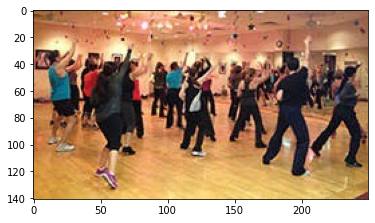

In [6]:
# convert 3D array back to img

import matplotlib.pyplot as plt
plt.imshow(img)

In [7]:
import pandas as pd
training_csv = pd.read_csv('/content/drive/MyDrive/Human Action Recognition/Training_set.csv')
training_csv['label'].unique()
training_csv['filename']

c = len(training_csv['label'].unique())
print('The number of classes is', c)

training_data = training_csv.set_index('filename')
train = training_data.to_dict()
print(train)
# sample_human_action = train['label']['Image_948.jpg']
sample_human_action = train['label'].get('Image_948.jpg')
print(sample_human_action)

testing_csv = pd.read_csv('/content/drive/MyDrive/Human Action Recognition/Testing_set.csv')
# testing_csv['filename']


The number of classes is 15
{'label': {'Image_1.jpg': 'sitting', 'Image_2.jpg': 'using_laptop', 'Image_3.jpg': 'hugging', 'Image_4.jpg': 'sleeping', 'Image_5.jpg': 'using_laptop', 'Image_6.jpg': 'sleeping', 'Image_7.jpg': 'drinking', 'Image_8.jpg': 'hugging', 'Image_9.jpg': 'clapping', 'Image_10.jpg': 'dancing', 'Image_11.jpg': 'cycling', 'Image_12.jpg': 'drinking', 'Image_13.jpg': 'clapping', 'Image_14.jpg': 'calling', 'Image_15.jpg': 'sleeping', 'Image_16.jpg': 'drinking', 'Image_17.jpg': 'calling', 'Image_18.jpg': 'laughing', 'Image_19.jpg': 'using_laptop', 'Image_20.jpg': 'using_laptop', 'Image_21.jpg': 'clapping', 'Image_22.jpg': 'eating', 'Image_23.jpg': 'fighting', 'Image_24.jpg': 'listening_to_music', 'Image_25.jpg': 'dancing', 'Image_26.jpg': 'drinking', 'Image_27.jpg': 'cycling', 'Image_28.jpg': 'laughing', 'Image_29.jpg': 'drinking', 'Image_30.jpg': 'dancing', 'Image_31.jpg': 'listening_to_music', 'Image_32.jpg': 'cycling', 'Image_33.jpg': 'sitting', 'Image_34.jpg': 'sitting

In [8]:
training_csv['label'].unique()
translate = {'sitting':0, 'using_laptop':1, 'hugging':2, 'sleeping':3, 'drinking':4,'clapping':5, 'dancing':6, 'cycling':7, 'calling':8, 'laughing':9, 'eating':10,
             'fighting':11, 'listening_to_music':12, 'running':13, 'texting':14}

In [9]:
# training_csv['label'].value_counts()

In [10]:
image_array = []
image_label = []
# counter = 0

for i in dataset:
    img = load_img(i, target_size = (150,150))
    img = img_to_array(img)
    img = img/255
    image_array.append(img)
    label = i.split('/')[-1]
    image_label.append(translate[train['label'].get(label)])

# image_array

In [11]:
# image_label

In [12]:
import numpy as np

image_array = np.array(image_array)
image_label = np.array(image_label)

print(image_array.shape)
print(image_label.shape)

(12000, 150, 150, 3)
(12000,)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_array, image_label, test_size = 0.1)

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10800, 150, 150, 3)
(10800,)
(1200, 150, 150, 3)
(1200,)


In [15]:
# Build the model

from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Flatten, GlobalMaxPooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from keras.regularizers import l2, l1, l1_l2

In [16]:
i = Input(shape = X_train[0].shape)

# x = Conv2D(32, (3,3), strides = 2, activation = 'relu', padding = 'same', kernel_regularizer = l2(0.01), bias_regularizer = l2(0.01))(i)
# x = Conv2D(32, (3,3), strides = 2, activation = 'relu', padding = 'same', kernel_regularizer = l1(0.01), bias_regularizer = l1(0.01))(i)
# x = Conv2D(32, (3,3), strides = 2, activation = 'relu', padding = 'same', kernel_regularizer = l1_l2(l1 = 0.01, l2 = 0.01), bias_regularizer = l1_l2(l1 = 0.01, l2 = 0.01))(i)
x = Conv2D(32, (3,3), strides = 2, activation = 'relu', padding = 'same')(i)
x = BatchNormalization() (x)

# x = Conv2D(64, (3,3), strides = 2, activation = 'relu', padding = 'same', kernel_regularizer = l2(0.01), bias_regularizer = l2(0.01))(x)
# x = Conv2D(64, (3,3), strides = 2, activation = 'relu', padding = 'same', kernel_regularizer = l1(0.01), bias_regularizer = l1(0.01))(x)
# x = Conv2D(64, (3,3), strides = 2, activation = 'relu', padding = 'same', kernel_regularizer = l1_l2(l1 = 0.01, l2 = 0.01), bias_regularizer = l1_l2(l1 = 0.01, l2 = 0.01))(x)
x = Conv2D(64, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)

# x = Conv2D(128, (3,3), strides = 2, activation = 'relu', padding = 'same', kernel_regularizer = l2(0.01), bias_regularizer = l2(0.01))(x)
# x = Conv2D(128, (3,3), strides = 2, activation = 'relu', padding = 'same', kernel_regularizer = l1(0.01), bias_regularizer = l1(0.01))(x)
# x = Conv2D(128, (3,3), strides = 2, activation = 'relu', padding = 'same', kernel_regularizer = l1_l2(l1 = 0.01, l2 = 0.01), bias_regularizer = l1_l2(l1 = 0.01, l2 = 0.01))(x)
x = Conv2D(128, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)

# x = Conv2D(256, (3,3), strides = 2, activation = 'relu', padding = 'same', kernel_regularizer = l2(0.01), bias_regularizer = l2(0.01))(x)
# x = Conv2D(256, (3,3), strides = 2, activation = 'relu', padding = 'same', kernel_regularizer = l1(0.01), bias_regularizer = l1(0.01))(x)
# x = Conv2D(256, (3,3), strides = 2, activation = 'relu', padding = 'same', kernel_regularizer = l1_l2(l1 = 0.01, l2 = 0.01), bias_regularizer = l1_l2(l1 = 0.01, l2 = 0.01))(x)
x = Conv2D(256, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)

# x = Conv2D(512, (3,3), strides = 2, activation = 'relu', padding = 'same', kernel_regularizer = l2(0.01), bias_regularizer = l2(0.01))(x)
# x = Conv2D(512, (3,3), strides = 2, activation = 'relu', padding = 'same', kernel_regularizer = l1(0.01), bias_regularizer = l1(0.01))(x)
# x = Conv2D(512, (3,3), strides = 2, activation = 'relu', padding = 'same', kernel_regularizer = l1_l2(l1 = 0.01, l2 = 0.01), bias_regularizer = l1_l2(l1 = 0.01, l2 = 0.01))(x)
x = Conv2D(512, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)

# x = Conv2D(1024, (3,3), strides = 2, activation = 'relu', padding = 'same', kernel_regularizer = l2(0.01), bias_regularizer = l2(0.01))(x)
# x = Conv2D(1024, (3,3), strides = 2, activation = 'relu', padding = 'same', kernel_regularizer = l1(0.01), bias_regularizer = l1(0.01))(x)
# x = Conv2D(1024, (3,3), strides = 2, activation = 'relu', padding = 'same', kernel_regularizer = l1_l2(l1 = 0.01, l2 = 0.01), bias_regularizer =l1_l2(l1 = 0.01, l2 = 0.01))(x)
x = Conv2D(1024, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)

# x = Conv2D(1024, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
# x = BatchNormalization()(x)

# x = Flatten()(x)
x = GlobalMaxPooling2D()(x)

x = Dropout(0.2)(x)
x = Dense(1024, activation = 'relu')(x)

x = Dropout(0.2)(x)
x = Dense(512, activation = 'relu')(x)

x = Dropout(0.2)(x)
x = Dense(c, activation = 'softmax')(x)

model = Model(i,x)

In [17]:
# compile and fit the model

# model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# model.compile(optimizer = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0001)

opt = tf.keras.optimizers.Adam(0.001)
# opt = tf.keras.optimizers.Adam(0.01)
# opt = tf.keras.optimizers.Adam(0.00001)
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20)

Epoch 1/20
338/338 [==============================] - 18s 22ms/step - loss: 2.6786 - accuracy: 0.1545 - val_loss: 3.0383 - val_accuracy: 0.1058
Epoch 2/20
338/338 [==============================] - 7s 20ms/step - loss: 2.3670 - accuracy: 0.2209 - val_loss: 3.7766 - val_accuracy: 0.1033
Epoch 3/20
338/338 [==============================] - 7s 20ms/step - loss: 2.2234 - accuracy: 0.2721 - val_loss: 2.5110 - val_accuracy: 0.2042
Epoch 4/20
338/338 [==============================] - 7s 20ms/step - loss: 2.1427 - accuracy: 0.2951 - val_loss: 2.3197 - val_accuracy: 0.2475
Epoch 5/20
338/338 [==============================] - 7s 20ms/step - loss: 2.0334 - accuracy: 0.3343 - val_loss: 2.3108 - val_accuracy: 0.2450
Epoch 6/20
338/338 [==============================] - 7s 20ms/step - loss: 1.9249 - accuracy: 0.3698 - val_loss: 2.3050 - val_accuracy: 0.2775
Epoch 7/20
338/338 [==============================] - 7s 20ms/step - loss: 1.8021 - accuracy: 0.4057 - val_loss: 2.6246 - val_accuracy: 0.230

In [18]:
batch_size = 24
# data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)
# data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1)
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    # rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2)
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size
r = model.fit_generator(train_generator, validation_data = (X_test, y_test), steps_per_epoch = steps_per_epoch, epochs = 50)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


450/450 [==============================] - 48s 106ms/step - loss: 2.3442 - accuracy: 0.2595 - val_loss: 2.3482 - val_accuracy: 0.2950
Epoch 2/50
450/450 [==============================] - 48s 106ms/step - loss: 2.1604 - accuracy: 0.3072 - val_loss: 2.1783 - val_accuracy: 0.3017
Epoch 3/50
450/450 [==============================] - 48s 106ms/step - loss: 2.0995 - accuracy: 0.3283 - val_loss: 2.0224 - val_accuracy: 0.3450
Epoch 4/50
450/450 [==============================] - 48s 106ms/step - loss: 2.0796 - accuracy: 0.3287 - val_loss: 2.4369 - val_accuracy: 0.2617
Epoch 5/50
450/450 [==============================] - 48s 106ms/step - loss: 2.0377 - accuracy: 0.3419 - val_loss: 2.2084 - val_accuracy: 0.2883
Epoch 6/50
450/450 [==============================] - 48s 106ms/step - loss: 2.0131 - accuracy: 0.3495 - val_loss: 2.1004 - val_accuracy: 0.3358
Epoch 7/50
450/450 [==============================] - 48s 106ms/step - loss: 1.9782 - accuracy: 0.3657 - val_loss: 2.6482 - val_accuracy: 0.2

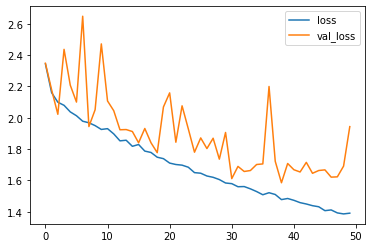

In [19]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

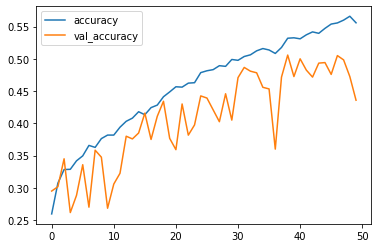

In [20]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [21]:
y_test_pred = model.predict(X_test)

In [22]:
y_test_pred

array([[3.9587211e-02, 1.1700816e-03, 1.7684385e-03, ..., 9.8555651e-04,
        3.4832838e-01, 1.7783549e-02],
       [1.9374290e-01, 4.3436453e-02, 2.6174800e-02, ..., 2.0305455e-02,
        4.5097787e-02, 6.9614299e-02],
       [8.3628576e-03, 3.9053166e-03, 1.1265849e-02, ..., 4.9542385e-01,
        2.5738342e-04, 2.4371925e-01],
       ...,
       [7.2497264e-03, 4.3055224e-03, 1.3959753e-02, ..., 6.4662332e-03,
        3.1401014e-01, 1.4219567e-02],
       [2.8915850e-02, 1.2406214e-03, 6.2482748e-03, ..., 4.5100495e-04,
        4.0494773e-01, 8.6115167e-04],
       [2.3063870e-02, 2.1566972e-02, 2.6380917e-02, ..., 7.0076413e-02,
        2.0372683e-01, 2.0574693e-01]], dtype=float32)

In [23]:
y_test_pred_decoded = []

len(y_test_pred)
for i in range(0, len(y_test_pred)):
  y_test_pred_decoded.append(y_test_pred[i].argmax())

# y_test_pred_decoded

In [24]:
reverse_translate = {0:'sitting', 1:'using_laptop', 2:'hugging', 3:'sleeping', 4:'drinking', 5:'clapping', 6:'dancing', 7:'cycling', 8:'calling', 9:'laughing', 10:'eating',
             11: 'fighting', 12: 'listening_to_music', 13: 'running', 14: 'texting'}

In [25]:
for i in range(0, len(y_test)):
  print('Image number:',i, '      ','Actual activity:', reverse_translate[y_test[i]], '      ', 'Predicted activity:',reverse_translate[y_test_pred_decoded[i]])

Image number: 0        Actual activity: fighting        Predicted activity: fighting
Image number: 1        Actual activity: fighting        Predicted activity: fighting
Image number: 2        Actual activity: drinking        Predicted activity: listening_to_music
Image number: 3        Actual activity: using_laptop        Predicted activity: calling
Image number: 4        Actual activity: sitting        Predicted activity: hugging
Image number: 5        Actual activity: drinking        Predicted activity: drinking
Image number: 6        Actual activity: texting        Predicted activity: calling
Image number: 7        Actual activity: sleeping        Predicted activity: dancing
Image number: 8        Actual activity: texting        Predicted activity: drinking
Image number: 9        Actual activity: eating        Predicted activity: eating
Image number: 10        Actual activity: texting        Predicted activity: dancing
Image number: 11        Actual activity: laughing        Predic

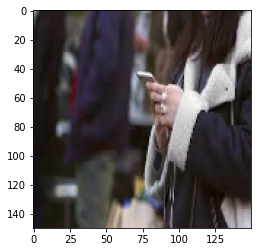

In [32]:
# Check the differences

img = plt.imshow(X_test[1142]) # Actual activity: sleeping        Predicted activity: calling
img = plt.imshow(X_test[1143]) # Actual activity: sleeping        Predicted activity: texting
img = plt.imshow(X_test[1195]) # Actual activity: listening_to_music        Predicted activity: laughing
img = plt.imshow(X_test[1191]) # Actual activity: texting        Predicted activity: fighting


In [27]:
import sklearn.metrics as metrics
accuracy = metrics.accuracy_score(y_test, y_test_pred_decoded)
error = 1 - accuracy
precision = metrics.precision_score(y_test, y_test_pred_decoded, average = 'weighted')
recall = metrics.recall_score(y_test, y_test_pred_decoded, average = 'weighted')
f1 = metrics.f1_score(y_test, y_test_pred_decoded, average = 'weighted')
cm = metrics.confusion_matrix(y_test, y_test_pred_decoded)

print('accuracy:', accuracy)
print('error:', error)
print('precision:', precision)
print('recall:', recall)
print('f1:',f1)
print('\n')
print(cm)

from sklearn.metrics import classification_report
print('\n')
print(classification_report(y_test, y_test_pred_decoded))

accuracy: 0.43583333333333335
error: 0.5641666666666667
precision: 0.4811063247439683
recall: 0.43583333333333335
f1: 0.43292781565254773


[[11  4  3  1  5  7  7  1  5  3  3  8  2  2  3]
 [ 6 25  1  1 11  2  4  2 14 11  2  1  4  0  9]
 [ 1  0 22  3  9  2  2  0  5 22  0  4  3  3  5]
 [ 3  5  2 31  3  0  5  2  4 16  0  6  1  0  6]
 [ 1  1  5  2 34  3  3  0  6 20  0  0  5  1  5]
 [ 2  0  2  1  3 34 10  2  3  5  1  3  1  0  3]
 [ 0  2  0  0  2  0 63  5  0  5  0  2  2  4  3]
 [ 5  1  0  0  1  1  6 52  1  2  0  1  0 10  0]
 [ 0  1  1  0  6  1  4  0 32 19  0  1  2  1  5]
 [ 0  0  1  0  2  1  3  0  8 55  1  0  1  0  0]
 [ 1  0  1  0  5  2  2  0  2  4 45  0  0  0  2]
 [ 4  0  0  0  2  5 13 10  0  7  0 34  1  5  3]
 [ 0  1  2  2  5  0  5  1 23 17  1  3 30  1  6]
 [ 5  0  0  1  3  1 14  9  1  2  0  4  1 32  2]
 [ 3  1  3  2 11  0  5  1 18  7  3  3  8  0 23]]


              precision    recall  f1-score   support

           0       0.26      0.17      0.21        65
           1       0.61     

(150, 150, 3)
(1, 150, 150, 3)
The activity depicted in the image is hugging


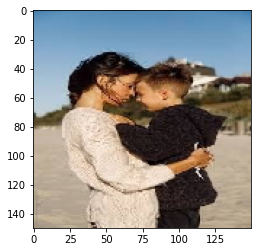

In [36]:
test_dir = '/content/drive/MyDrive/Human Action Recognition/test'
image_id = 'Image_5390.jpg'
image_path = os.path.join(test_dir, image_id)
img = load_img(image_path, target_size = (150,150))
img = img_to_array(img)
img = img/255
print(img.shape)
plt.imshow(img)

img = np.expand_dims(img, axis = 0)
print(img.shape)

human_action_prediction = model.predict(img)
# print(type(human_action_prediction))

human_action_prediction.argmax() # this will give the index of the max value in a numpy array
# np.max(human_action_prediction) this will give the max value in a numpy array

print('The activity depicted in the image is', reverse_translate[human_action_prediction.argmax()])






